# WISE QSO / AGN Cont. compensation

In [1]:
import sys
sys.path.insert(0, '../Packages/')
import personal as f
import numpy as np 
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import ufloat, unumpy
import uncertainties.umath as u
from scipy import stats
from astropy.cosmology import Planck18 as cosmo 

In [2]:
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}  #Settings for plots
sns.set_theme(style='ticks' ,context='paper', rc=custom_params)

In [3]:
no_data = 9876543
allwise = f.fits_to_df('../WISE/AllWISE_ETHER.fits').drop_duplicates(subset=['RAJ2000','DEJ2000']).reset_index(drop=True)
allwise.columns

Index(['ETHER_ID', 'ONAME', 'RA', 'DEC', 'Z', 'DIST', 'MBH', 'MBHHI', 'MBHLO',
       'MBHSOURCE', 'MBHPUB', 'MBHUPLIM', 'LOGLBOL', 'NED_TYPE', 'IS_VLBI',
       'AllWISE', 'RAJ2000', 'DEJ2000', 'eeMaj', 'eeMin', 'eePA', 'W1mag',
       'W2mag', 'W3mag', 'W4mag', 'Jmag', 'Hmag', 'Kmag', 'e_W1mag', 'e_W2mag',
       'e_W3mag', 'e_W4mag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'ID', 'ccf', 'ex',
       'var', 'qph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'd2M', 'angDist'],
      dtype='object')

In [4]:
allwise_positive_z = allwise[(allwise['Z']>0) & (allwise['Z']!=no_data)]
allwise_positive_z

,ETHER_ID,ONAME,RA,DEC,Z,DIST,MBH,MBHHI,MBHLO,MBHSOURCE,...,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
0,0,b'WISEAJ222301.23-892309.1',335.754058,-89.385872,0.90,1607.02450,9.283960e+00,9.384164e+00,9.183757e+00,10.0,...,b'0000',b'0',b'0011',b'AAAB',132,48,-168,48,0.161,0.048716
3,3,b'WISEAJ032224.88-890636.7',50.604774,-89.110263,1.30,1728.05930,9.057154e+00,9.160674e+00,8.953633e+00,10.0,...,b'0000',b'0',b'000n',b'AAAB',101,83,164,87,NaN,0.209600
4,4,b'WISEAJ200526.32-890341.6',301.359882,-89.061621,1.20,1710.65050,7.796773e+00,7.917969e+00,7.675577e+00,10.0,...,b'0000',b'0',b'0011',b'AAAA',-163,59,-29,61,0.128,0.148824
5,5,b'IRAS22470-8915',347.233400,-88.987190,0.02,83.59599,7.442080e+00,7.575482e+00,7.308678e+00,10.0,...,b'0000',b'5',b'1000',b'AAAA',-174,37,19,35,0.233,0.224874
6,6,b'WISEAJ110928.23-884822.7',167.368725,-88.806145,0.10,380.41315,9.876543e+06,9.876543e+06,9.876543e+06,9876543.0,...,b'0000',b'0',b'00nn',b'AABU',-111,366,725,340,NaN,0.610340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153537,1337832,b'WISEAJ090906.11+871642.7',137.275496,87.278542,1.40,1739.33310,7.662640e+00,7.816543e+00,7.508738e+00,10.0,...,b'0000',b'0',b'00nn',b'AAAB',-32,250,302,260,NaN,0.000013
1153538,1337833,b'WISEAJ230039.17+871644.4',345.163374,87.279008,0.60,1378.98140,8.828164e+00,8.923850e+00,8.732479e+00,10.0,...,b'0000',b'0',b'1110',b'AAAA',-192,106,62,128,0.161,0.026543
1153539,1337834,b'WISEAJ093345.87+871708.2',143.440443,87.285610,0.10,380.41315,6.887239e+00,7.046911e+00,6.727567e+00,10.0,...,b'0000',b'0',b'nnnn',b'AAAA',240,37,-91,37,0.228,0.153330
1153540,1337835,b'WISEAJ021357.85+871728.7',33.491028,87.291313,1.50,1745.54210,8.283550e+00,8.391853e+00,8.175248e+00,10.0,...,b'0000',b'0',b'0000',b'AAAA',-276,42,244,40,1.317,0.006416


In [5]:
qph_list = allwise_positive_z['qph'].str.decode('utf8').to_list()       #Extract quality flags
no_conf = ['U', 'X', 'Z']                                               #Upper or Null values in W bands
booleans = [not any(letter in qph[:-1] for letter in no_conf) for qph in qph_list]        #Test quality flags

good_quality_wise = allwise_positive_z[booleans].copy()

qph_list = good_quality_wise['qph'].str.decode('utf8').to_list()                   #Extract quality flags

def quality_flag(value):
    if 'C' in value:
        return 'C'
    elif 'B' in value:
        return 'B'
    return 'A'

good_quality_wise['Quality'] = [quality_flag(qph[:-1]) for qph in qph_list]  

good_quality_wise

,ETHER_ID,ONAME,RA,DEC,Z,DIST,MBH,MBHHI,MBHLO,MBHSOURCE,...,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,Quality
0,0,b'WISEAJ222301.23-892309.1',335.754058,-89.385872,0.90,1607.02450,9.283960e+00,9.384164e+00,9.183757e+00,10.0,...,b'0',b'0011',b'AAAB',132,48,-168,48,0.161,0.048716,A
3,3,b'WISEAJ032224.88-890636.7',50.604774,-89.110263,1.30,1728.05930,9.057154e+00,9.160674e+00,8.953633e+00,10.0,...,b'0',b'000n',b'AAAB',101,83,164,87,NaN,0.209600,A
4,4,b'WISEAJ200526.32-890341.6',301.359882,-89.061621,1.20,1710.65050,7.796773e+00,7.917969e+00,7.675577e+00,10.0,...,b'0',b'0011',b'AAAA',-163,59,-29,61,0.128,0.148824,A
5,5,b'IRAS22470-8915',347.233400,-88.987190,0.02,83.59599,7.442080e+00,7.575482e+00,7.308678e+00,10.0,...,b'5',b'1000',b'AAAA',-174,37,19,35,0.233,0.224874,A
6,6,b'WISEAJ110928.23-884822.7',167.368725,-88.806145,0.10,380.41315,9.876543e+06,9.876543e+06,9.876543e+06,9876543.0,...,b'0',b'00nn',b'AABU',-111,366,725,340,NaN,0.610340,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153537,1337832,b'WISEAJ090906.11+871642.7',137.275496,87.278542,1.40,1739.33310,7.662640e+00,7.816543e+00,7.508738e+00,10.0,...,b'0',b'00nn',b'AAAB',-32,250,302,260,NaN,0.000013,A
1153538,1337833,b'WISEAJ230039.17+871644.4',345.163374,87.279008,0.60,1378.98140,8.828164e+00,8.923850e+00,8.732479e+00,10.0,...,b'0',b'1110',b'AAAA',-192,106,62,128,0.161,0.026543,A
1153539,1337834,b'WISEAJ093345.87+871708.2',143.440443,87.285610,0.10,380.41315,6.887239e+00,7.046911e+00,6.727567e+00,10.0,...,b'0',b'nnnn',b'AAAA',240,37,-91,37,0.228,0.153330,A
1153540,1337835,b'WISEAJ021357.85+871728.7',33.491028,87.291313,1.50,1745.54210,8.283550e+00,8.391853e+00,8.175248e+00,10.0,...,b'0',b'0000',b'AAAA',-276,42,244,40,1.317,0.006416,A


# WISE magnitude to Total Infrared Luminosity (L_TIR)
More steps to do basically the same, but maybe the direct relation from WISE mag to luminosity is causing all this overestimations.

In [6]:
f_v0 = 31.674   #zero magnitude flux density for constant powe-law (assumed) from https://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html
sun_ergs = np.log10(3.839e33)       #from Jarret et al. (2013) https://iopscience.iop.org/article/10.1088/0004-6256/145/1/6
flux_dens = f_v0*(10**(- good_quality_wise['W3mag']/2.5))   #Eq. 1 from same documentation as above, in Jansky (10-26 W m-2 Hz-1)

Next steps:
- lum distances from astropy WMAP9 with redshift in case a distance is not present in DIST
- go from flux to lum using 4pir^2, be carefull with the units, logs and solar conversions
- compare the value of an already studied source (e.g. MRK231) from Cluver et al. (2017)

In [7]:
hz_W3 = 3e8/1.2e-5     #12 micrometers to Hz (for vLv)

dist_in_mpc = cosmo.luminosity_distance(good_quality_wise['Z'].to_list()).value
dist_in_m = dist_in_mpc*3.085e22

flux_dens_watts = flux_dens*10e-26
lum_nu = 4*np.pi*flux_dens_watts*(dist_in_m**2)
nu_lum_nu = hz_W3*lum_nu 

nu_lum_nu_ergs = nu_lum_nu*1e7

log_nu_lum = np.log10(nu_lum_nu_ergs)
log_nu_lum_lsun = log_nu_lum - sun_ergs

log_ltir_lsun = 0.889*log_nu_lum_lsun + 2.21
log_ltir_ergs = log_ltir_lsun + sun_ergs

#sfr = f.ltir_to_sfr(log_ltir_ergs)

good_quality_wise['logLTIR'] = log_ltir_ergs

In [8]:
w1 = unumpy.uarray(good_quality_wise['W1mag'],good_quality_wise['e_W1mag'])
w2 = unumpy.uarray(good_quality_wise['W2mag'],good_quality_wise['e_W2mag'])
w3 = unumpy.uarray(good_quality_wise['W3mag'],good_quality_wise['e_W3mag'])
z = good_quality_wise['Z'].to_list()

w1abs = w1 - f.distance_modulus(z)

good_quality_wise['W1_abs'] = unumpy.nominal_values(w1abs)

w1w2 = w1-w2
w2w3 = w2-w3

good_quality_wise['W1W2'] = unumpy.nominal_values(w1w2)
good_quality_wise['W2W3'] = unumpy.nominal_values(w2w3)

In [9]:
log_sm = f.wise_to_logsm(w1abs, w1w2)
t_value = f.w2w3_to_morph(unumpy.nominal_values(w2w3))
bulge_ratio = f.morph_to_bulge_ratio(t_value)
log_bm = np.log10(bulge_ratio) + log_sm
log_mbh = f.bulge_to_mbh(log_bm)
comp_mbh = f.comp_mbh(log_mbh)

good_quality_wise['logSM'] = unumpy.nominal_values(log_sm)
good_quality_wise['WISE_MBH'] = unumpy.nominal_values(comp_mbh)

In [10]:
sm_mask = (good_quality_wise['logSM']>=9.22) & (good_quality_wise['logSM']<=12.86)

good_quality_wise = good_quality_wise[sm_mask]

# Complete sample

Text(0.5, 0, 'log L_TIR (erg/s)')

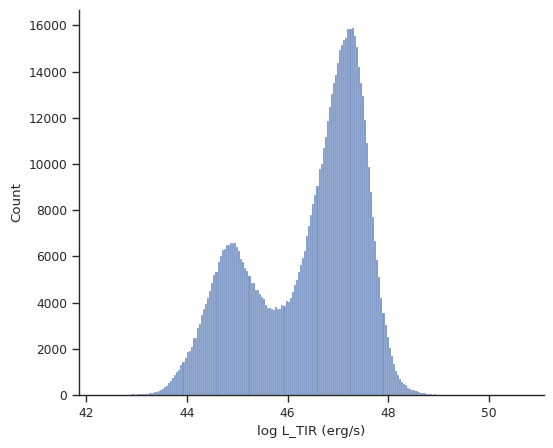

In [11]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=good_quality_wise, x='logLTIR')
plt.xlabel('log L_TIR (erg/s)')

# W1-W2 color below 0.8 (for non-AGN)

In [12]:
boolean = good_quality_wise['W1W2'] < 0.8

Text(0.5, 0, 'log L_TIR (erg/s)')

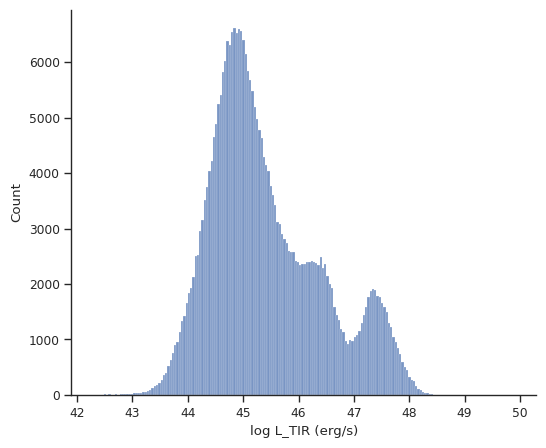

In [13]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=good_quality_wise[boolean], x='logLTIR')
plt.xlabel('log L_TIR (erg/s)')

# non-AGN and nearby (z below 0.08)

Text(0.5, 0, 'log L_TIR (erg/s)')

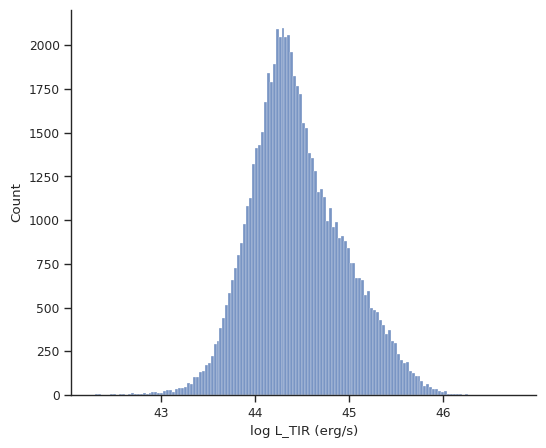

In [14]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=good_quality_wise[boolean & (good_quality_wise['Z']<0.08)], x='logLTIR')
plt.xlabel('log L_TIR (erg/s)')

# Just ones with Bolometric Luminosity (LOGLBOL)

In [15]:
with_lbol = good_quality_wise['LOGLBOL']!=no_data
good_quality_wise['IS_LBOL'] = [True if bol!=no_data else False for bol in good_quality_wise['LOGLBOL']]

wise_with_lbol = good_quality_wise[with_lbol].copy()

/tmp/ipykernel_12458/3014109197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_quality_wise['IS_LBOL'] = [True if bol!=no_data else False for bol in good_quality_wise['LOGLBOL']]


Text(0.5, 0, 'log L_TIR (erg/s)')

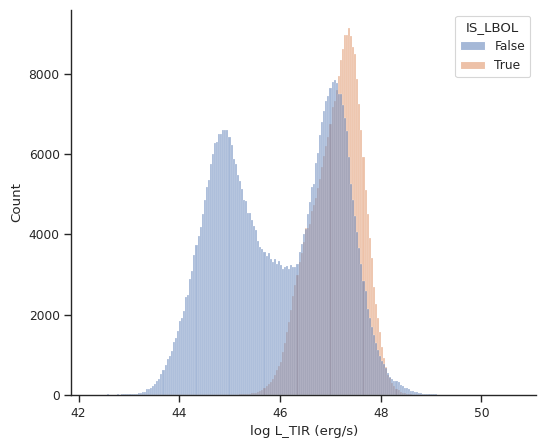

In [16]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=good_quality_wise, x='logLTIR', hue='IS_LBOL')
plt.xlabel('log L_TIR (erg/s)')

Text(0.5, 0, 'log L_TIR (erg/s)')

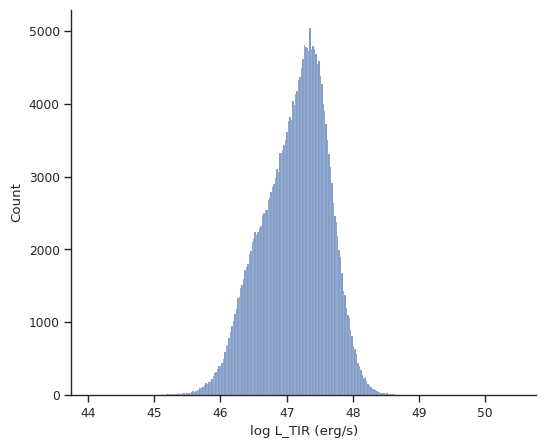

In [17]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=wise_with_lbol, x='logLTIR')
plt.xlabel('log L_TIR (erg/s)')

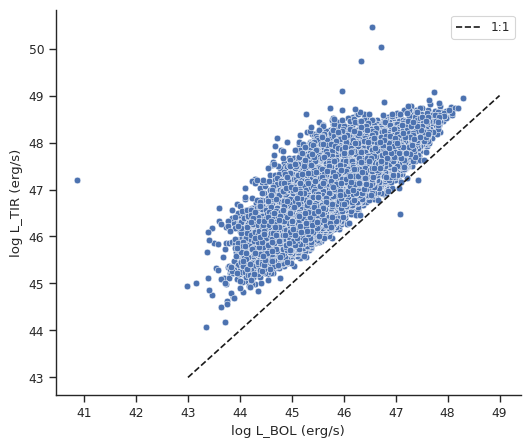

In [18]:
x1 = [43,49]
y1 = x1

plt.figure(figsize=(6,5), dpi=100)
sns.scatterplot(x='LOGLBOL',y='logLTIR',data=wise_with_lbol)
#sns.kdeplot(x='LOGLBOL',y='logLTIR',data=wise_with_lbol, color='gold')
plt.plot(x1,y1, label='1:1', ls='--', c='k')

plt.xlabel('log L_BOL (erg/s)')
plt.ylabel('log L_TIR (erg/s)')
plt.legend()

# MBH estimtions of AGN Cont. sources without modification

In [19]:
log_sm_mask = (wise_with_lbol['logSM']>=9.22) & (wise_with_lbol['logSM']<=12.86)
wise_with_lbol_good_sm = wise_with_lbol[log_sm_mask].copy()

6.328769779958712 10.317361726756625


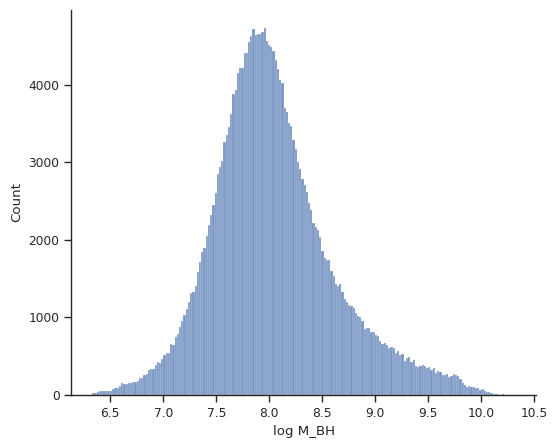

In [20]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(x='WISE_MBH', data=wise_with_lbol_good_sm)
plt.xlabel('log M_BH')

print(min(wise_with_lbol_good_sm['WISE_MBH']), max(wise_with_lbol_good_sm['WISE_MBH']))

Most of the estimations look reasonable, min/max values after logSM masking looks also great

<Figure size 600x500 with 0 Axes>

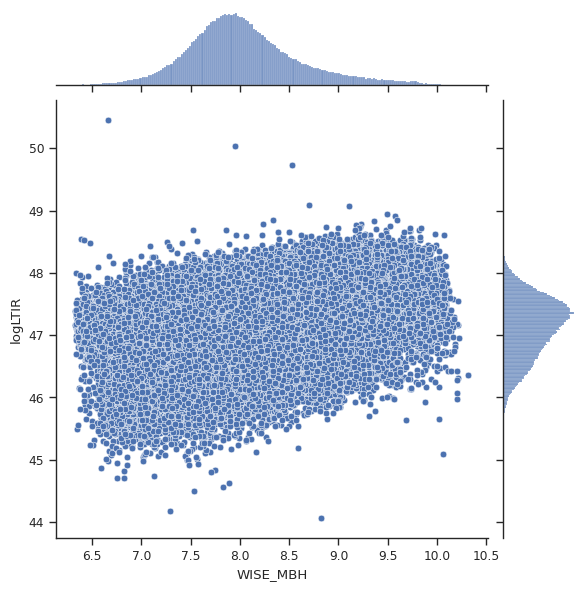

In [21]:
plt.figure(figsize=(6,5), dpi=100)
sns.jointplot(x='WISE_MBH',y='logLTIR',data=wise_with_lbol_good_sm)
#sns.kdeplot(x='WISE_MBH',y='logLTIR',data=wise_with_lbol_good_sm, color='gold')

There's no appearent relation between TIR luminosity and MBH estimations done with WISE mags.

In [22]:
wise_with_lbol_good_sm['MBHSOURCE'].value_counts(), wise_with_lbol_good_sm['MBHPUB'].value_counts()

(3.0          257175
 6.0             321
 9.0              20
 4.0              14
 1.0               3
 0.0               2
 9876543.0         2
 5.0               1
 Name: MBHSOURCE, dtype: int64,
 0          257122
 33            245
 32             76
 34             43
 44             20
 35             15
 43             10
 30              2
 9876543         2
 37              2
 31              1
 Name: MBHPUB, dtype: int64)

No good previous estimations to compare the new ones, so this the process will be mostly blind, considering no possible comparisons

# Selecting sample to fit compensations
BOL luminosity is necessary, but the compensaion must be fited with AGN and no-AGN contaminated sources

In [23]:
bol_no_cont = wise_with_lbol_good_sm['W1W2']<0.8
bol_an_cont = wise_with_lbol_good_sm['W1W2']>0.8

Text(0.5, 0, 'log L_TIR (erg/s)')

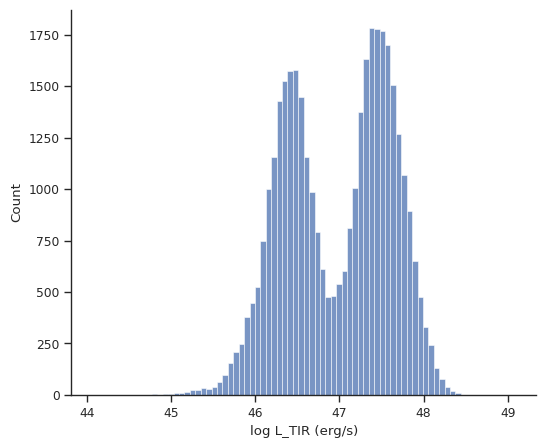

In [24]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=wise_with_lbol_good_sm[bol_no_cont], x='logLTIR')
plt.xlabel('log L_TIR (erg/s)')

Text(0.5, 0, 'log L_TIR (erg/s)')

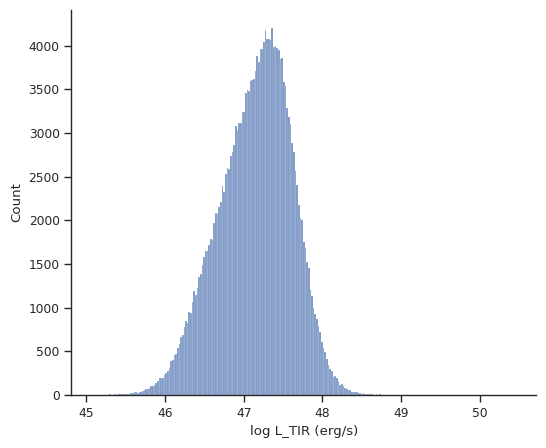

In [25]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=wise_with_lbol_good_sm[bol_an_cont], x='logLTIR')
plt.xlabel('log L_TIR (erg/s)')

In [26]:
tir_bigger_bol_cond = wise_with_lbol_good_sm['logLTIR']>wise_with_lbol_good_sm['LOGLBOL']
tir_bigger_bol = wise_with_lbol_good_sm[tir_bigger_bol_cond].copy()

# First try: Percentage reduce from TIR to WISE mags

In [27]:
to_reduce = (tir_bigger_bol['logLTIR'] - tir_bigger_bol['LOGLBOL'])*100/tir_bigger_bol['logLTIR']   #Percentage to reduce W3mag

In [28]:
w1_in_w3 = 100              #Percentage of W1mag in W3mag from Cluver et al. (2017)
w2_in_w3 = 100              #Same as above but for W2mag (guess)

In [29]:
w3_redu = tir_bigger_bol['W3mag'] + tir_bigger_bol['W3mag']*to_reduce/100
w2_redu = tir_bigger_bol['W2mag'] + tir_bigger_bol['W2mag']*to_reduce/100*(w2_in_w3/100)
w1_redu = tir_bigger_bol['W1mag'] + tir_bigger_bol['W1mag']*to_reduce/100*(w1_in_w3/100)

w1w2redu = w1_redu - w2_redu
w2w3redu = w2_redu - w3_redu

w1absredu = w1_redu - f.distance_modulus(tir_bigger_bol['Z'].to_list())

In [30]:
log_sm = f.wise_to_logsm(w1absredu, w1w2redu)
t_value = f.w2w3_to_morph(w2w3redu)
bulge_ratio = f.morph_to_bulge_ratio(t_value)
log_bm = np.log10(bulge_ratio) + log_sm
log_mbh = f.bulge_to_mbh(log_bm)
comp_mbh = f.comp_mbh(log_mbh)

tir_bigger_bol['MBH_Decont_1'] = unumpy.nominal_values(comp_mbh)

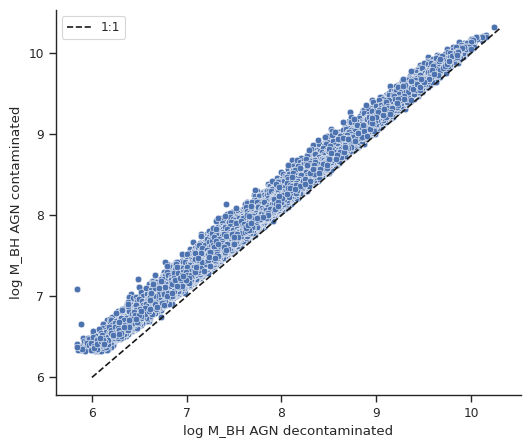

In [31]:
x1 = [6,10.3]
y1 = x1

plt.figure(figsize=(6,5), dpi=100)
sns.scatterplot(data=tir_bigger_bol, x='MBH_Decont_1', y='WISE_MBH')
plt.plot(x1,y1, label='1:1', ls='--', c='k')
plt.xlabel('log M_BH AGN decontaminated')
plt.ylabel('log M_BH AGN contaminated')
plt.legend()

In [32]:
percen_reduce = (tir_bigger_bol['WISE_MBH'].mean() - tir_bigger_bol['MBH_Decont_1'].mean())*100/tir_bigger_bol['WISE_MBH'].mean()
print('Reduction percentage of mean value: {}'.format(percen_reduce))

Reduction percentage of mean value: 2.546265764664859


Little changes, specialy in the mean MBH estimations

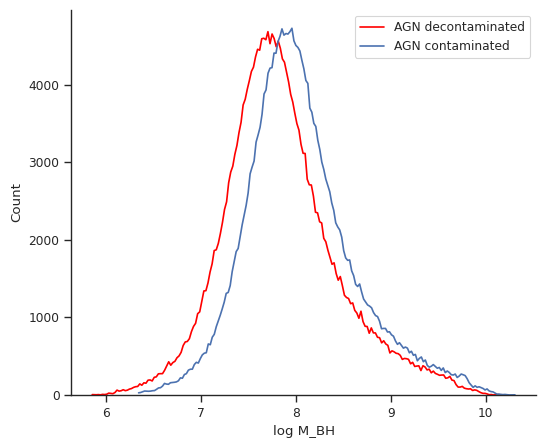

In [33]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(x=tir_bigger_bol['MBH_Decont_1'], color='red', fill=False, element='poly')
sns.histplot(x=tir_bigger_bol['WISE_MBH'], fill=False, element='poly')
plt.xlabel('log M_BH')
plt.legend(['AGN decontaminated','AGN contaminated'])

The values are slightly lower than previous ones (dirty), so this compensation do exactly what it must do.
# Second try: Direct substraction of difference of TIR and BOL to WISE mags

In [34]:
to_reduce_direct = tir_bigger_bol['logLTIR'] - tir_bigger_bol['LOGLBOL']

In [35]:
w3_redu = tir_bigger_bol['W3mag'] + to_reduce_direct
w2_redu = tir_bigger_bol['W2mag'] + to_reduce_direct*(w2_in_w3/100)
w1_redu = tir_bigger_bol['W1mag'] + to_reduce_direct*(w1_in_w3/100)

w1w2redu = w1_redu - w2_redu
w2w3redu = w2_redu - w3_redu

w1absredu = w1_redu - f.distance_modulus(tir_bigger_bol['Z'].to_list())

In [36]:
log_sm = f.wise_to_logsm(w1absredu, w1w2redu)
t_value = f.w2w3_to_morph(w2w3redu)
bulge_ratio = f.morph_to_bulge_ratio(t_value)
log_bm = np.log10(bulge_ratio) + log_sm
log_mbh = f.bulge_to_mbh(log_bm)
comp_mbh = f.comp_mbh(log_mbh)

tir_bigger_bol['MBH_Decont_2'] = unumpy.nominal_values(comp_mbh)

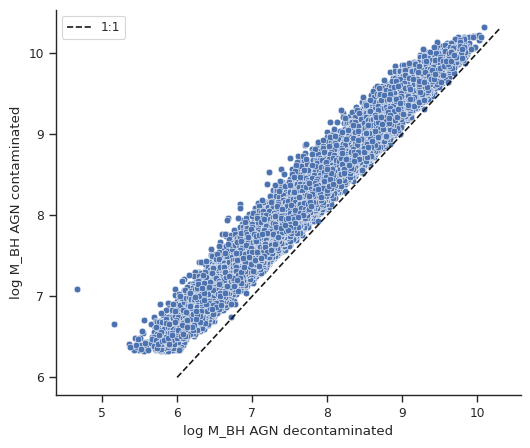

In [37]:
x1 = [6,10.3]
y1 = x1

plt.figure(figsize=(6,5), dpi=100)
sns.scatterplot(data=tir_bigger_bol, x='MBH_Decont_2', y='WISE_MBH')
plt.plot(x1,y1, label='1:1', ls='--', c='k')
plt.xlabel('log M_BH AGN decontaminated')
plt.ylabel('log M_BH AGN contaminated')
plt.legend()

In [38]:
percen_reduce = (tir_bigger_bol['WISE_MBH'].mean() - tir_bigger_bol['MBH_Decont_2'].mean())*100/tir_bigger_bol['WISE_MBH'].mean()
print('Reduction percentage of mean value: {}'.format(percen_reduce))

Reduction percentage of mean value: 5.193824752916757


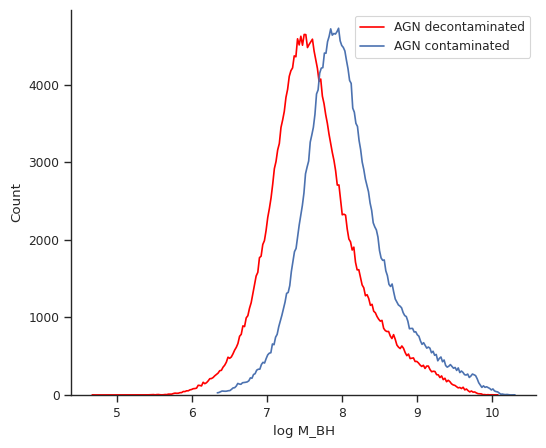

In [39]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(x=tir_bigger_bol['MBH_Decont_2'], color='red', fill=False, element='poly')
sns.histplot(x=tir_bigger_bol['WISE_MBH'], fill=False, element='poly')
plt.xlabel('log M_BH')
plt.legend(['AGN decontaminated','AGN contaminated'])

# Third try: Percentage reduction to WISE mags and W1-W2 color

In [40]:
w3_redu = tir_bigger_bol['W3mag'] + tir_bigger_bol['W3mag']*to_reduce/100
w2_redu = tir_bigger_bol['W2mag'] + tir_bigger_bol['W2mag']*to_reduce/100*(w2_in_w3/100)
w1_redu = tir_bigger_bol['W1mag'] + tir_bigger_bol['W1mag']*to_reduce/100*(w1_in_w3/100)

w1w2redu = w1_redu - w2_redu
w1w2redu_redu = w1w2redu - w1w2redu*to_reduce/100

w2w3redu = w2_redu - w3_redu

w1absredu = w1_redu - f.distance_modulus(tir_bigger_bol['Z'].to_list())

In [41]:
log_sm = f.wise_to_logsm(w1absredu, w1w2redu_redu)
t_value = f.w2w3_to_morph(w2w3redu)
bulge_ratio = f.morph_to_bulge_ratio(t_value)
log_bm = np.log10(bulge_ratio) + log_sm
log_mbh = f.bulge_to_mbh(log_bm)
comp_mbh = f.comp_mbh(log_mbh)

tir_bigger_bol['MBH_Decont_3'] = unumpy.nominal_values(comp_mbh)

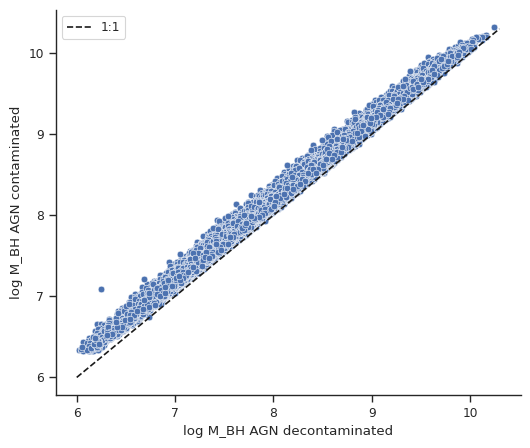

In [42]:
x1 = [6,10.3]
y1 = x1

plt.figure(figsize=(6,5), dpi=100)
sns.scatterplot(data=tir_bigger_bol, x='MBH_Decont_3', y='WISE_MBH')
plt.plot(x1,y1, label='1:1', ls='--', c='k')
plt.xlabel('log M_BH AGN decontaminated')
plt.ylabel('log M_BH AGN contaminated')
plt.legend()

In [43]:
percen_reduce = (tir_bigger_bol['WISE_MBH'].mean() - tir_bigger_bol['MBH_Decont_3'].mean())*100/tir_bigger_bol['WISE_MBH'].mean()
print('Reduction percentage of mean value: {}'.format(percen_reduce))

Reduction percentage of mean value: 1.9513216999101197


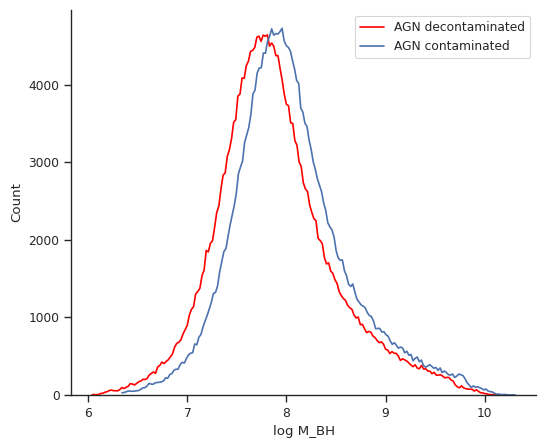

In [44]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(x=tir_bigger_bol['MBH_Decont_3'], color='red', fill=False, element='poly')
sns.histplot(x=tir_bigger_bol['WISE_MBH'], fill=False, element='poly')
plt.xlabel('log M_BH')
plt.legend(['AGN decontaminated','AGN contaminated'])

# QSO study

In [45]:
good_quality_wise.columns

Index(['ETHER_ID', 'ONAME', 'RA', 'DEC', 'Z', 'DIST', 'MBH', 'MBHHI', 'MBHLO',
       'MBHSOURCE', 'MBHPUB', 'MBHUPLIM', 'LOGLBOL', 'NED_TYPE', 'IS_VLBI',
       'AllWISE', 'RAJ2000', 'DEJ2000', 'eeMaj', 'eeMin', 'eePA', 'W1mag',
       'W2mag', 'W3mag', 'W4mag', 'Jmag', 'Hmag', 'Kmag', 'e_W1mag', 'e_W2mag',
       'e_W3mag', 'e_W4mag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'ID', 'ccf', 'ex',
       'var', 'qph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'd2M', 'angDist',
       'Quality', 'logLTIR', 'W1_abs', 'W1W2', 'W2W3', 'logSM', 'WISE_MBH',
       'IS_LBOL'],
      dtype='object')

In [46]:
good_quality_wise['NED_TYPE'].value_counts()

b'9876543.0'    316990
b'G'            243914
b'QSO'          139166
b'RadioS'        18956
b'PofG'             23
Name: NED_TYPE, dtype: int64

In [47]:
good_quality_wise['NED_TYPE'] = good_quality_wise['NED_TYPE'].str.decode('utf8').to_list()

/tmp/ipykernel_12458/805460465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_quality_wise['NED_TYPE'] = good_quality_wise['NED_TYPE'].str.decode('utf8').to_list()


<AxesSubplot: xlabel='WISE_MBH', ylabel='Count'>

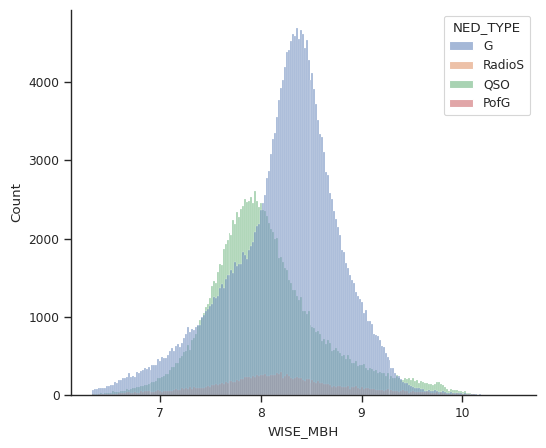

In [48]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=good_quality_wise[good_quality_wise['NED_TYPE']!='9876543.0'], x='WISE_MBH', hue='NED_TYPE')

<AxesSubplot: xlabel='W2W3', ylabel='W1W2'>

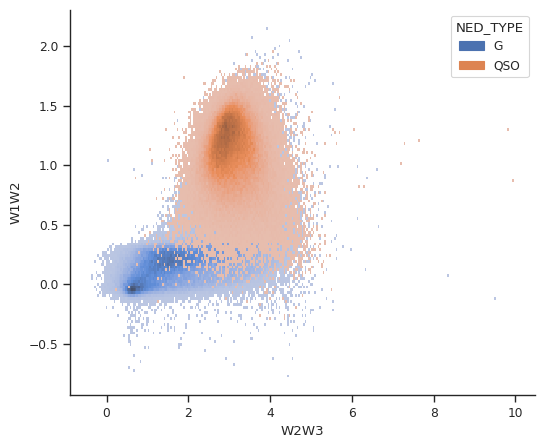

In [49]:
plt.figure(figsize=(6,5), dpi=100)
sns.histplot(data=good_quality_wise[(good_quality_wise['NED_TYPE']=='QSO') | (good_quality_wise['NED_TYPE']=='G')], y='W1W2', x='W2W3', hue='NED_TYPE')

<AxesSubplot: xlabel='W2W3', ylabel='W1W2'>

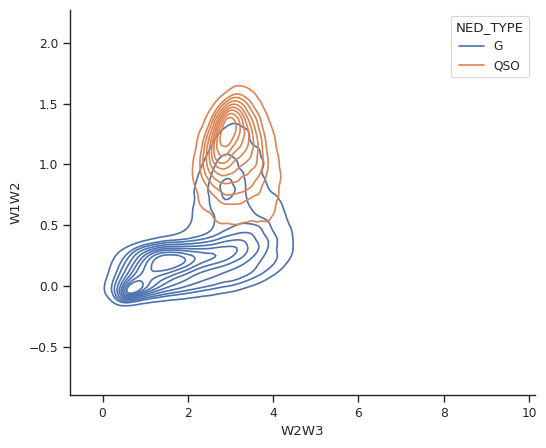

In [50]:
plt.figure(figsize=(6,5), dpi=100)
sns.kdeplot(data=good_quality_wise[(good_quality_wise['NED_TYPE']=='QSO') | (good_quality_wise['NED_TYPE']=='G')], y='W1W2', x='W2W3', hue='NED_TYPE')

<Figure size 1200x1000 with 0 Axes>

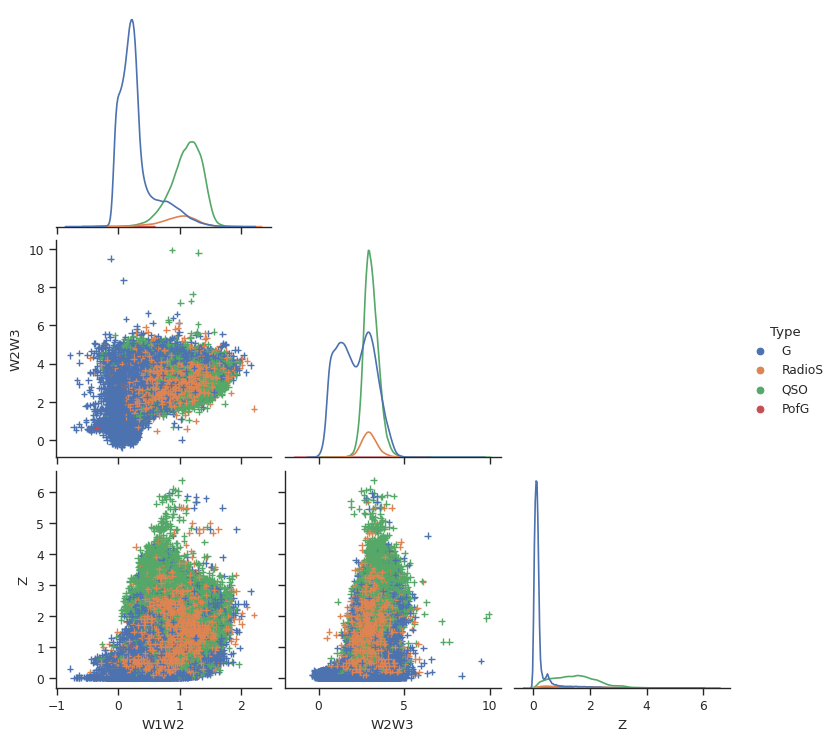

In [53]:
x = good_quality_wise[good_quality_wise['NED_TYPE']!='9876543.0']['W1W2']
y = good_quality_wise[good_quality_wise['NED_TYPE']!='9876543.0']['W2W3']
z = good_quality_wise[good_quality_wise['NED_TYPE']!='9876543.0']['Z']
hue = good_quality_wise[good_quality_wise['NED_TYPE']!='9876543.0']['NED_TYPE']

to_pairplot = pd.DataFrame({'W1W2':x,'W2W3':y,'Z':z,'Type':hue})

plt.figure(figsize=(6,5), dpi=200)
sns.pairplot(to_pairplot, hue='Type', corner=True, plot_kws=dict(marker="+", linewidth=1), diag_kws=dict(fill=False))

# Galaxy distributions

<AxesSubplot:xlabel='Z', ylabel='Count'>

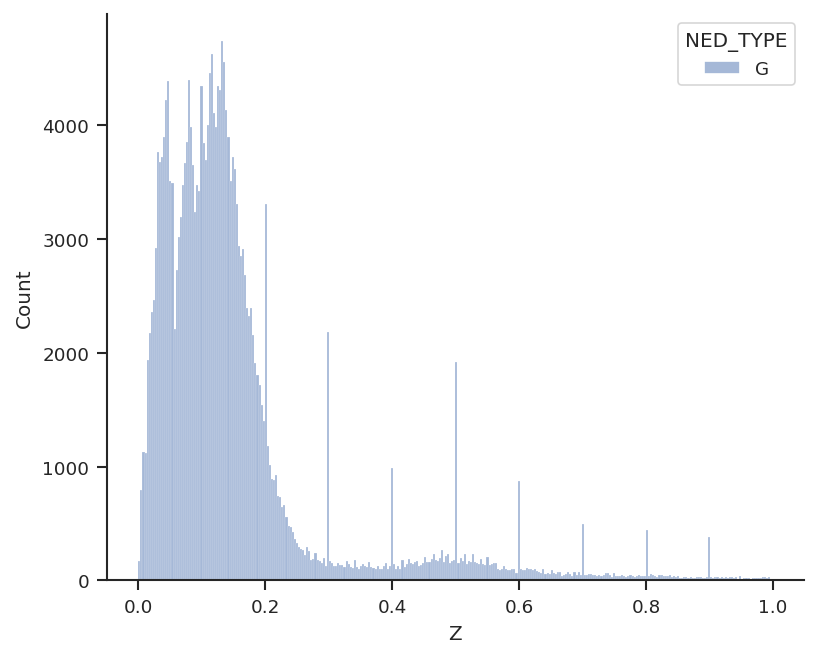

In [49]:
plt.figure(figsize=(6,5), dpi=150)
sns.histplot(data=good_quality_wise[(good_quality_wise['NED_TYPE']=='G') & (good_quality_wise['Z']<1)], x='Z', hue='NED_TYPE')

<AxesSubplot:xlabel='W2W3', ylabel='W1W2'>

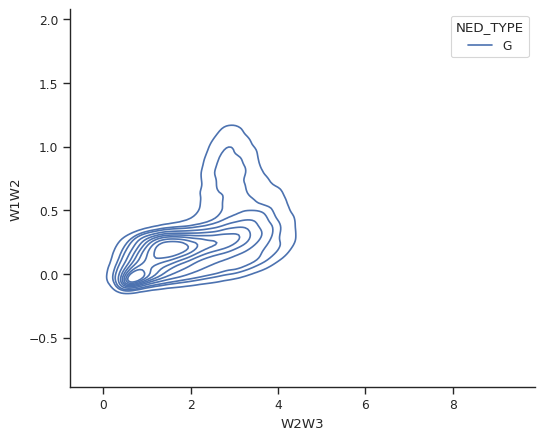

In [53]:
plt.figure(figsize=(6,5), dpi=100)
sns.kdeplot(data=good_quality_wise[(good_quality_wise['NED_TYPE']=='G') & (good_quality_wise['Z']<1)], y='W1W2', x='W2W3', hue='NED_TYPE')

In [53]:
good_quality_wise[(good_quality_wise['ex']==b'0')&(good_quality_wise['W1W2']>0.5) & (good_quality_wise['DEC']<30)]

,EHTER_ID,ONAME,RA,DEC,Z,DIST,MBH,MBHHI,MBHLO,MBHSOURCE,...,d2M,angDist,Quality,logLTIR,W1_abs,W1W2,W2W3,logSM,WISE_MBH,IS_LBOL
0,0,b'WISEAJ222301.23-892309.1',335.754058,-89.385872,0.900,1607.0245,9.283960,9.384164,9.183757,10.0,...,0.161,0.048716,A,47.526358,-31.359156,0.968000,2.184999,11.920382,9.283959,False
3,3,b'WISEAJ032224.88-890636.7',50.604774,-89.110263,1.300,1728.0593,9.057154,9.160674,8.953633,10.0,...,NaN,0.209600,A,47.465882,-30.881091,0.971000,2.490000,11.723277,9.057154,False
4,4,b'WISEAJ200526.32-890341.6',301.359882,-89.061621,1.200,1710.6505,7.796773,7.917969,7.675577,10.0,...,0.128,0.148824,A,47.918818,-30.705813,1.433001,3.477000,10.747644,7.796772,False
7,7,b'WISEAJ201713.09-881135.5',304.304581,-88.193259,1.200,1710.6505,8.220464,8.345820,8.095108,10.0,...,NaN,0.157778,B,47.088136,-29.508813,1.124000,2.647000,10.874486,8.220465,False
8,9,b'WISEAJ195652.19-875121.4',299.220255,-87.856034,0.500,1259.0836,8.024951,8.158789,7.891114,10.0,...,NaN,0.479896,B,46.221121,-27.374636,0.790000,2.677000,10.675454,8.024951,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685591,798755,b'SDSSJ081259.41+295956.3',123.247552,29.998984,1.688,1746.4674,8.487278,8.691090,8.283465,10.0,...,NaN,0.878051,C,47.180197,-29.630702,0.984000,2.924000,11.197641,8.487277,False
685592,798757,b'Gaia4598963230082581760',263.466335,29.999145,1.356,1735.0552,8.378380,8.482180,8.274579,10.0,...,0.090,0.089212,A,47.895750,-31.314941,1.393000,2.843000,11.069697,8.378380,False
685594,798759,b'SDSSJ021031.70+295957.2',32.632084,29.999246,0.822,1562.8308,8.014539,8.150644,7.878433,10.0,...,NaN,0.176408,A,46.957836,-28.734387,1.025001,3.154000,10.758754,8.014537,False
685596,798761,b'111747.75+295957.5',169.448980,29.999334,1.903,1734.9716,9.180161,9.351237,9.009085,3.0,...,NaN,0.228734,B,47.432599,-29.409493,1.546000,3.293000,10.007638,7.244315,True
